In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport 
import plotly.express as px

import plotly.graph_objects as go
from plotly.offline import iplot                    # Used for interactive plots
import matplotlib.pyplot as plt   

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

## Any results you write to the current directory are saved as output.

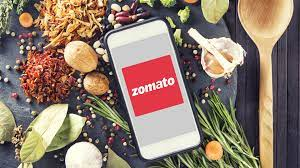

Zomato is a restaurant search and discovery service founded in 2008 by Indian entrepreneurs Deepinder Goyal and Pankaj Chaddah, this network caters to millions of users every month. It currently operates in 23 countries. Zomato let's users search restaurants, get recommendations, add reviews, photos and such. They've recently released this directory of all restaurants & eateries currently under its purview.

# **Introduction:**

This is an Exploratory Data Analysis of the Zomato Dataset. Here, we'll look into the Zomato dataset, visualise it, discuss it, and try to find patterns, if any. The level of the Data is at a Restaurant Id Level.

Ultimately, we'll try to find if there are particular factors that help us predict the Aggregate Restaurant Rating.!

In [ ]:
zomato_data = pd.read_csv("../input/zomato-restaurants-data/zomato.csv", encoding = "ISO-8859-1")

**Initial View Of the Dataset**

In [ ]:
zomato_data.head()

In [ ]:
zomato_data.shape

In [ ]:
zomato_data.info()

From the above working, we can understand the following attributes:

The dataset has 9551 rows and 21 columns
There are 3 columns with float, 5 columns with int, 14 columns that are categorical
There is one column 'Cuisines' that has missing values

In [ ]:
zomato_data.columns

**The data contains the following columns -**

* Restaurant ID - Unique identification assigned to each restaurant by Zomato. In itself, for this dataset, it does not serve any useful purpose.
* Restaurant Name - Name of the Restaurant
* Country Code
* City*
* Address
* Locality
* Locality Verbose - Locality along with City info*
* Latitude*
* Longitude*
* Cusinies - List of cusines served*
* Average Cost of two (INR if consider data from India/Indian Cities)*
* Currency
* Has Table Booking (boolean)
* Has Online Delivery (boolean)
* Is Delivering Now (boolean)
* Switch to order menu (boolean)
* Price range (levels)
* Aggregate rating (avg of all votes received)*
* Rating Color (Zomato's lingo)
* Rating text (V.Good,Good,Avg,Poor)*
* Votes

*Points of Interest

In [ ]:
zomatoPandasProfile = ProfileReport(zomato_data, title = 'Zomato Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [ ]:
zomatoPandasProfile


In [ ]:
zomato_data.head(2)

# **Data Quality Assessment**

**1. Missing Values**

If we remember from our zomato_data.info(), we have one column, **Cuisines** with missing values.

There are multiple ways to deal with missing values. A few of the methods that we can use to populate the missing values are as follows:

* Fill up the missing values with the most commonly occuring value in the column (mode)
* Fill in values based on what would make more sense per the domain of the data in consideration (Verify with Subject Matter Expert)
* Remove the rows if the percentage of missing values is negligible to your analysis

More Ways to deal with Missing Values In Machine Learning Datasets can be found [here](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)

For this case, we will be populating the missing values with the Mode (the most commonly occuring cuisine)

In [ ]:
zomato_data['Cuisines'].mode()

In [ ]:
zomato_data[zomato_data['Cuisines']=="North Indian"]

In [ ]:
zomato_data['Cuisines'].mode()[0]

In [ ]:
zomato_data['Cuisines'].fillna(zomato_data['Cuisines'].mode()[0], inplace=True)

In [ ]:
zomato_data.info()

**2. Incosistent Values**

We know that data can contain inconsistent values. Most probably we have already faced this issue at some point. It may be due to human error or maybe the information was misread while being scanned from a handwritten form.

# **Visualization with Zomato Data**

One of the easiest ways to understand the data is to simply look at it. Depending on the complexity of the data, we can look at the table or we can try to visualize it. A visualization does not need to be complex or colorful. An effective visualization should convey the underlying information properly.

We will begin with simple and effective visualizations and gradually make out way to more interesting ones.

We have a 2-D Canvas i.e., our computer screen when it comes to visualizing the data. The components that we can use to introduce dimensionality include the following:

* X-Axis
* Y-Axis
* Color
* Shape
* Viz within viz

**1. Zomato's Presence across the Globe**

In [ ]:
# Plotting thecoordinates of the restaurants on an interactive map 

zomato = zomato_data.copy(deep=True)

colorscale = [
[0, 'rgb(255, 255, 255)'], 
[0.1, 'rgb(255, 255, 255)'],
[0.2, 'rgb(212, 28, 28)'], 
[0.3, 'rgb(212, 28, 28)'],
[0.4, 'rgb(255, 186, 59)'], 
[0.5, 'rgb(255, 186, 59)'],
[0.6, 'rgb(248, 255, 59)'], 
[0.7, 'rgb(248, 255, 59)'], 
[0.8, 'rgb(0, 227, 30)'], 
[0.9, 'rgb(0, 227, 30)'],
[1, 'rgb(0, 117, 16)']
]

fig1 = [dict(
    type='scattergeo',
    lon = zomato['Longitude'],
    lat = zomato['Latitude'],
    text = zomato['Restaurant Name'], 
    mode = 'markers',
    marker = dict(
    color = zomato['Rating color'],
    cmin = zomato['Aggregate rating'].min(),
    cmax = zomato['Aggregate rating'].max(),
    colorscale=colorscale,
    colorbar = dict(
                title = 'Rating'
            )
        )
    )]

fig_layout = dict(
    title = 'Rating of zomato restaurants on the world map'
)
fig = go.Figure(data=fig1, layout=fig_layout)
iplot(fig)

**Quick Inferences -**

* Zomato's largest market is in India itself, nobody even comes close.
* Analysing data from India should give us a pretty accurate representation of the entire data.
* One important thing that might vary across different regions is the types of Cusinies. So it should be interesting to see how many cusinies are served throughout the world.

**2. What are the most common cuisines?**

In [ ]:
zomato_data.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()

In [ ]:
cuisine_data = zomato_data.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
cuisine_data.columns = ['Cuisines','Number of Resturants']
Top15= (cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
Top15

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cuisine_data = zomato_data.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
cuisine_data.columns = ['Cuisines','Number of Resturants']
Top15= (cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 cuisines on Zomato', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

**3. What are the top 15 restaurants with Maximum Outlets?**

In [ ]:
# Plotting pie chart with title and float with 1 decimal points
zomato_data['Restaurant Name'].value_counts().head(20).plot(kind='pie',figsize=(13,13), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')

Stay Tuned.!!